<a href="https://colab.research.google.com/github/archanadby05/Neural_Network_from_Scratch/blob/master/activation-functions/06_prelu_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Parametric ReLU (PReLU) and Comparison with Leaky ReLU

### 01. PReLU Function with Learnable Slope

We define the Parametric ReLU activation function, where the negative slope is a learnable parameter.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class PReLU:
    def __init__(self, alpha=0.01):
        self.alpha = alpha  # initial slope

    def forward(self, x):
        self.input = x
        return np.where(x > 0, x, self.alpha * x)

    def backward(self, grad_output):
        grad_input = np.where(self.input > 0, 1, self.alpha) * grad_output
        grad_alpha = np.sum(np.where(self.input < 0, self.input * grad_output, 0))
        return grad_input, grad_alpha

### 02. Visualize PReLU Behavior

We visualize how PReLU behaves for different values of α.

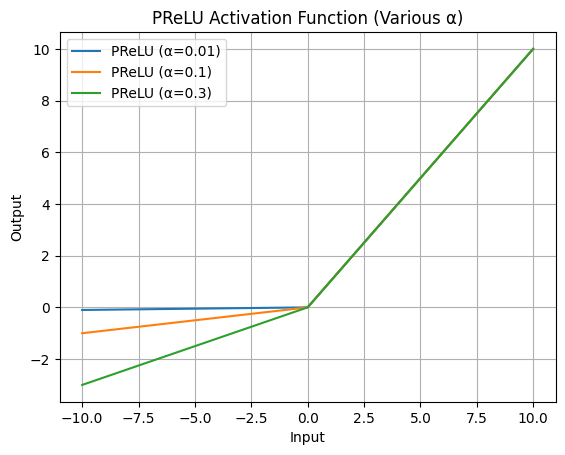

In [2]:
x = np.linspace(-10, 10, 400)
alphas = [0.01, 0.1, 0.3]

for alpha in alphas:
    prelu = PReLU(alpha)
    y = prelu.forward(x)
    plt.plot(x, y, label=f"PReLU (α={alpha})")

plt.title("PReLU Activation Function (Various α)")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()

*Explanation:*

Different α values lead to different slopes in the negative region. Unlike fixed Leaky ReLU, PReLU learns this slope dynamically for each neuron or layer.

### 03. Comparison with Leaky ReLU

*Explanation:*

Leaky ReLU uses a fixed slope, which may not be optimal for all tasks. PReLU adapts the slope based on the data and gradients, potentially leading to better performance and faster convergence.

### 04. Simple Neural Network Demo with PReLU

We simulate a one-layer neural net using PReLU and update α via gradient descent.

In [3]:
np.random.seed(0)

# Inputs and weights
X = np.random.randn(5, 3)
W = np.random.randn(3, 4)
b = np.random.randn(1, 4)

# Initialize PReLU
prelu = PReLU(alpha=0.1)

# Forward pass
Z = np.dot(X, W) + b
A = prelu.forward(Z)

# Fake gradient from next layer
grad_output = np.ones_like(A)

# Backward pass
grad_input, grad_alpha = prelu.backward(grad_output)

# Update alpha (gradient descent step)
lr = 0.01
prelu.alpha -= lr * grad_alpha

print("Updated α after one step:", prelu.alpha)

Updated α after one step: 0.15390457661615897


*Explanation:*

This example shows PReLU in action, including how α is updated during training. Over time, the model can adapt the slope to suit different layers or features.